### Official Tutorial on CLIMADA TP Reconstrcution

### Part 1: Load and Display IBTrACS data.

* Before starting, we need to download the data in NetCDF format and store in ./climada/data.
* To read IBTrACS data, apply from_ibtracs_netcdf() in the climada.hazard pacakge.
    * The parameters of from_ibtracs_netcdf() are: 
        * from_ibtracs_netcdf(
        * provider= (str or list of str, optional) [eg. 'usa', 'tokyo', 'newdelhi', 'reunion', 'bom', 'nadi', 'wellington', 'cma', 'hko', 'ds824', 'td9636', 'td9635', 'neumann', 'mlc', 'official', 'official_3h'...] [Default: None], 
        * rescale_windspeeds= (bool, optional) [Default: True], 
        * storm_id= (str or list of str, optional) [Default: None], 
        * year_range= (tuple (min_year, max_year), optional) [Default: None], 
        * basin= (str, optional) [Default: None], 
        * genesis_basin= (str, optional) [eg.  ‘NA’ (North Atlantic), ‘SA’ (South Atlantic), ‘EP’ (Eastern North Pacific, which includes the Central Pacific region), ‘WP’ (Western North Pacific), ‘SP’ (South Pacific), ‘SI’ (South Indian), ‘NI’ (North Indian)...] [Default: None], 
        * interpolate_missing= (bool, optional) [Default: True], 
        * estimate_missing= (bool, optional) [Default: False], 
        * correct_pres= (bool, optional) [Default: False], 
        * discard_single_points= (bool, optional) [Default: False], 
        * additional_variables= (list of str, optional) [Default: None], 
        * file_name='IBTrACS.ALL.v04r00.nc')


Number of tracks: 1


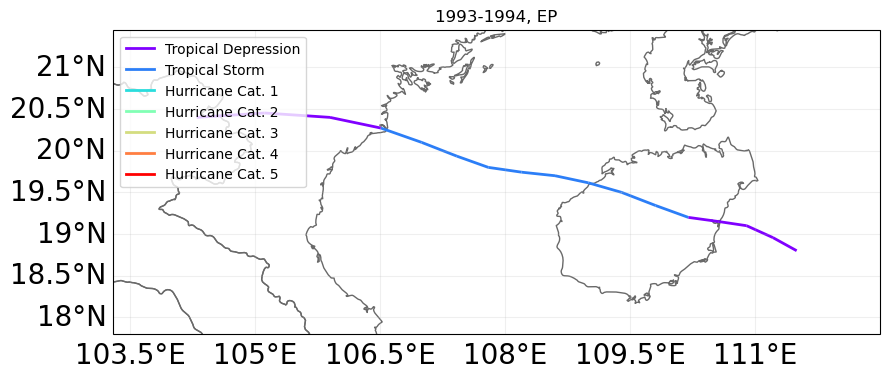

In [18]:
from climada.hazard import TCTracks

# Select TC from 1993 to 1994 in basin EP.
tc_1998 = TCTracks.from_ibtracs_netcdf(storm_id='2005210N19115')
print('Number of tracks:', tc_1998.size)
ax = tc_1998.plot()
ax.get_legend()._loc = 2 # Adjust legend location.
ax.set_title('1993-1994, EP')

from climada.hazard import Centroids, TropCyclone

# Construct centroids.
min_lat, max_lat, min_lon, max_lon = 5, 54, 74, 135
cent = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res = 0.1, crs='EPSG:4326')
cent.check()

# Construct tropical cyclones
tc_irma = TropCyclone.from_tracks(tc_1998, centroids = cent)
tc_irma.check()
#tc_irma.plot_intensity('tc_1998')

tc_irma.write_raster('C:/Users/wwwla/Desktop/tc_2005_WASHI.tif')